In [7]:
# Shanthi - Linear Regression model - self coding

In [8]:
## Import the Libraries and Data

In [9]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
house_data = pd.read_csv('../Data/Maison.csv')
house_data.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [34]:
house_data_renamed = house_data.rename(columns={'PRIX':'price','SUPERFICIE':'area','SDB':'bathrooms','ETAGES':'floors',
                                                'SALLEJEU':'game_room', 'CAVE': 'cellar','ALLEE':'driveway'
                                               ,'CHAMBRES': 'rooms', })
house_data_renamed.head()

,price,area,rooms,bathrooms,floors,driveway,game_room,cellar,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


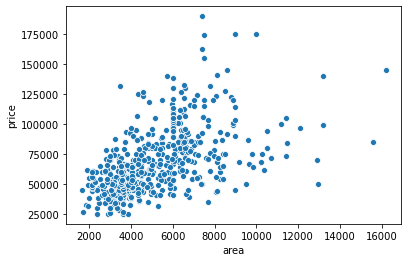

In [35]:
# Lets do scatter plot to see how price and area are spread
sns.scatterplot(house_data_renamed['area'],house_data_renamed['price'])

In [22]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

X = house_data_out1.drop('price',axis=1)
y = house_data_out1['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)


In [23]:
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     40.56
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.67e-37
Time:                        08:09:55   Log-Likelihood:                -1750.8
No. Observations:                 159   AIC:                             3524.
Df Residuals:                     148   BIC:                             3557.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4296.3713   6080.175     -0.707      0.481   -1.63e+04    7718.799
area           4.4723      0.879      5.088      0.000       2.735       6.209
rooms       -290.7735   1819.845     -0.160      0.873   -3887.010    3305.463
bathrooms    1.82e+04   2845.610      6.395      0.000    1.26e+04    2.38e+04
floors      7806.5913   1900.245      4.108      0.000    4051.474    1.16e+04
driveway    2543.3239   3360.823      0.757      0.450   -4098.073    9184.721
game_room   2241.6741   3213.151      0.698      0.486   -4107.906    8591.254
cellar      4434.4258   2879.615      1.540      0.126   -1256.046    1.01e+04
AIR         1.094e+04   2818.467      3.880      0.000    5366.235    1.65e+04
GARAGES     3847.4847   1637.192      2.350      0.020     612.193    7082.777
SITUATION   1.416e+04   3644.901      3.885      0.000    6957.355    2.14e+04
==============================================================================
Omnibus:                       35.164   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.061
Skew:                           0.965   Prob(JB):                     3.05e-17
Kurtosis:                       5.785   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
house_data_out1 = house_data_renamed.drop(house_data_renamed[house_data_renamed['area' ]> 10000].index)

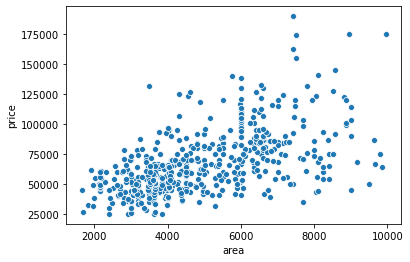

In [65]:
sns.scatterplot(house_data_out1['area'],house_data_renamed['price'])

In [66]:
house_data_out1.describe()

,price,area,rooms,bathrooms,floors,driveway,game_room,cellar,GAZ,AIR,GARAGES,SITUATION
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,67453.962121,4919.236742,2.964015,1.285985,1.818182,0.854167,0.181818,0.350379,0.045455,0.318182,0.678030,0.223485
std,26538.572473,1771.159961,0.734506,0.500126,0.873981,0.353274,0.386060,0.477541,0.208496,0.466212,0.861649,0.416976
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49000.000000,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61000.000000,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6100.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,9960.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [67]:
#count no of non zeros in each column
house_data_out1.astype(bool).sum(axis=0)
# We see GAZ has only 24 non zeros meaning 500 records have 0 record, we can remove this column

price        528
area         528
rooms        528
bathrooms    528
floors       528
driveway     451
game_room     96
cellar       185
GAZ           24
AIR          168
GARAGES      232
SITUATION    118
dtype: int64

In [68]:
# drop GAZ column
del house_data_out1['GAZ']
house_data_out1.astype(bool).sum(axis=0)

price        528
area         528
rooms        528
bathrooms    528
floors       528
driveway     451
game_room     96
cellar       185
AIR          168
GARAGES      232
SITUATION    118
dtype: int64

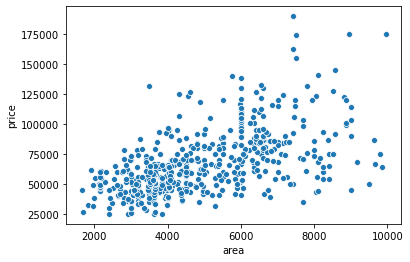

In [69]:
sns.scatterplot(house_data_out1['area'],house_data_renamed['price'])
# made no diff

In [20]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

X = house_data_out1.drop('price',axis=1)
y = house_data_out1['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [21]:
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     40.56
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.67e-37
Time:                        08:09:08   Log-Likelihood:                -1750.8
No. Observations:                 159   AIC:                             3524.
Df Residuals:                     148   BIC:                             3557.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4296.3713   6080.175     -0.707      0.481   -1.63e+04    7718.799
area           4.4723      0.879      5.088      0.000       2.735       6.209
rooms       -290.7735   1819.845     -0.160      0.873   -3887.010    3305.463
bathrooms    1.82e+04   2845.610      6.395      0.000    1.26e+04    2.38e+04
floors      7806.5913   1900.245      4.108      0.000    4051.474    1.16e+04
driveway    2543.3239   3360.823      0.757      0.450   -4098.073    9184.721
game_room   2241.6741   3213.151      0.698      0.486   -4107.906    8591.254
cellar      4434.4258   2879.615      1.540      0.126   -1256.046    1.01e+04
AIR         1.094e+04   2818.467      3.880      0.000    5366.235    1.65e+04
GARAGES     3847.4847   1637.192      2.350      0.020     612.193    7082.777
SITUATION   1.416e+04   3644.901      3.885      0.000    6957.355    2.14e+04
==============================================================================
Omnibus:                       35.164   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.061
Skew:                           0.965   Prob(JB):                     3.05e-17
Kurtosis:                       5.785   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""